In [1]:
import pandas as pd
import geopandas as gpd
import pybdshadow

#Read building data
buildings = gpd.read_file(r'../example/data/bd_demo.json')
buildings = pybdshadow.bd_preprocess(buildings)

buildings = buildings[(buildings['x']>139.698311)&
(buildings['x']<139.699311)&
(buildings['y']>35.533816)&
(buildings['y']<35.534816)]

#Given UTC time
date = pd.to_datetime('2015-01-01 03:45:33.959797119')

In [5]:

#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,roof=True,include_building = False)
shadows['type'] += ' shadow'

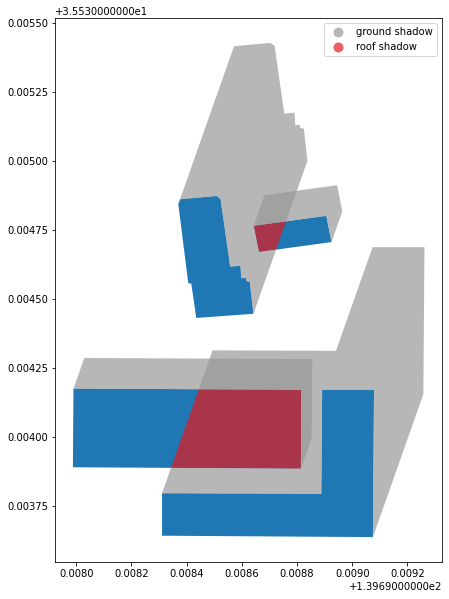

In [6]:
#Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,10))
ax = plt.subplot(111)


#建筑物
buildings.plot(ax = ax)

#地面阴影

shadows.plot(ax = ax,
            alpha = 0.7,
            column = 'type', 
            categorical=True, 
            cmap='Set1_r', 
            legend=True)

plt.show()